<a href="https://colab.research.google.com/github/tensorbytes0202/Machine-learning/blob/main/Random_forest_for_breast_cancer_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [7]:
data =  pd.read_csv('/content/data.csv')

In [8]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [24]:
rf_model = RandomForestClassifier(n_estimators=10000, random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10000, random_state=42)

In [25]:

y_pred = rf_model.predict(X_test)


In [26]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.9649122807017544


In [27]:
sample_results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})


In [16]:
print("\nSample predictions:")
print(sample_results.sample(10))


Sample predictions:
    Actual Predicted
108      B         M
27       B         B
79       B         B
72       B         B
110      M         M
106      B         B
77       M         B
18       B         B
51       M         M
24       B         B


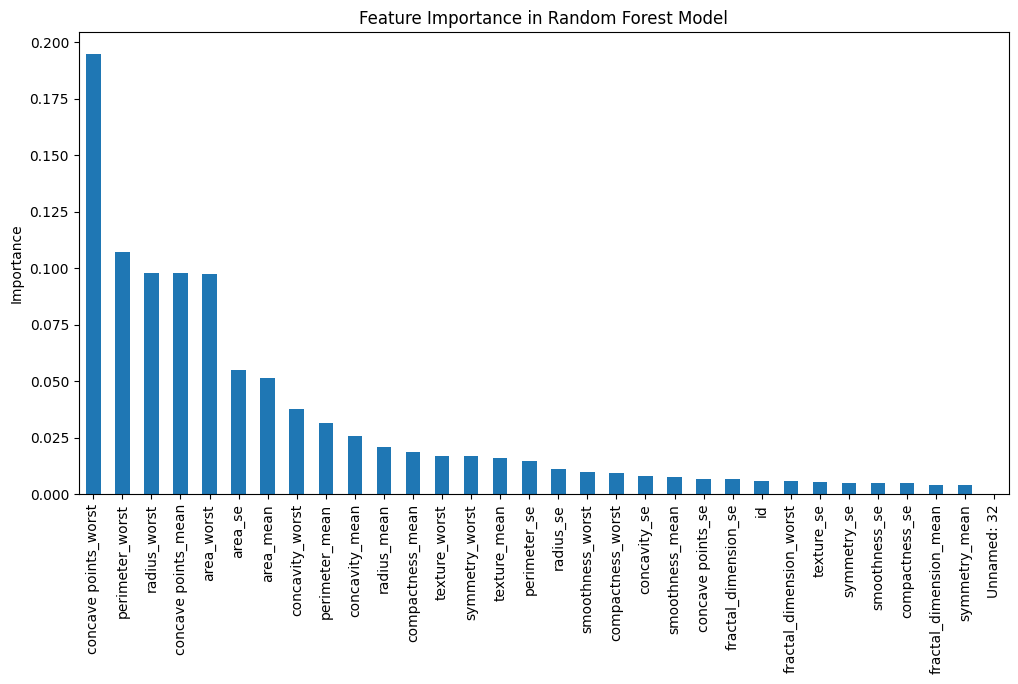

In [19]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(12,6))
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importance in Random Forest Model")
plt.ylabel("Importance")
plt.show()